# Analysis of cardiovascular diseases 

In this notebook, we will load the dataset which can be found at https://www.kaggle.com/sulianova/cardiovascular-disease-dataset and we will do necessary preprocessing 



In [24]:
# importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
data = pd.read_csv("/home/sankethbk7777/Analysis of Cardio Vascular diseases/cardio_train.csv", delimiter=";")

In [26]:
# shape of data set 

print(F"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")

Dataset has 70000 rows and 13 columns


In [27]:
print("FIrst 5 rows of dataset")

data.head()

FIrst 5 rows of dataset


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
# Types of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Brief description of each column

(These are current status of columns we may change some of them later)

 #### Numeric Columns 
 - id (discrete) : number
 - age (continuous) : in days 
 - height (continuous) : in cm 
 - weight (continuous) : in kg 
 - ap_hi (continuous) : systolic blood pressure (mm/Hg)
 - ap_lo : Diastolic blood pressure (mm/Hg)
 
 
 
 #### Categorical columns    
 - gender (nominal) :
     - 1 : women 
     - 2 : men 
 - cholestrol (ordinal):
      - 1 : normal 
      - 2 : above normal
      - 3 : well above normal  
 - gluc (ordinal): glucose level 
      - 1 : normal 
      - 2 : above normal
      - 3 : well above normal 
 - alco (binary) :
      - 0 : does not consume alcohol 
      - 1 : consumes alcohol 
 - active (binary) : exercise/obesity 
      - 0 : No exercise 
      - 1 : exercise 
 - cardio (binary) : 
      - 0 : Has cardiovascular diseases 
      - 1 : No CVD 

### Checking for null values

In [29]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Our dataset has no missing values.

### Checking for duplicated rows

In [30]:
data.duplicated().sum()

0

we don't have duplicate rows 

### We will drop id column as it is not necessary

In [31]:
data.drop(columns="id",inplace=True)

## Detecting Outliers

In [32]:
print("Overall summary of numerical columns")
data.describe()

Overall summary of numerical columns


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
data.quantile(1-0.02, axis = 0)

#sum(data['ap_lo'] < 50)

age            23417.0
gender             2.0
height           181.0
weight           110.0
ap_hi            170.0
ap_lo            110.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
Name: 0.98, dtype: float64

### we will examine each variable for outliers

 It would be easier to analyze the graphs if we standardize the values


If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

In [34]:
print(F"minimum weight = {data['weight'].min()} kg ")
print(F"minimum height = {data['height'].min()} cm")


minimum weight = 10.0 kg 
minimum height = 55 cm


### We will plot boxplot to visualize outliers

Since some columns have very high range of values converting them into standard values 
z = (x - mean) / variance 
can result in better boxplots

We suspect some some numerical columns to have outliers we will confirm it by plotting boxplots


In [35]:


x = data.copy(deep=True)


s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]

def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 

x_std=standartization(x)
print("melted dataset")
x_std.head()

melted dataset


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436058,2,0.443449,-0.847867,-0.122181,-0.088238,1,1,0,0,1,0
1,0.307684,1,-1.018161,0.749826,0.072610,-0.035180,3,1,0,0,1,1
2,-0.247995,1,0.078046,-0.708937,0.007679,-0.141296,3,1,0,0,0,1
3,-0.748147,2,0.565250,0.541431,0.137540,0.017878,1,1,0,0,1,1
4,-0.808538,1,-1.018161,-1.264657,-0.187111,-0.194354,1,1,0,0,0,0


In [36]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted

,cardio,features,value
0,0,age,-0.436058
1,1,age,0.307684
2,1,age,-0.247995
3,1,age,-0.748147
4,0,age,-0.808538
5,0,age,0.991036
6,0,age,1.071692
7,1,age,1.262593
8,0,age,-0.729908
9,0,age,0.147992


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

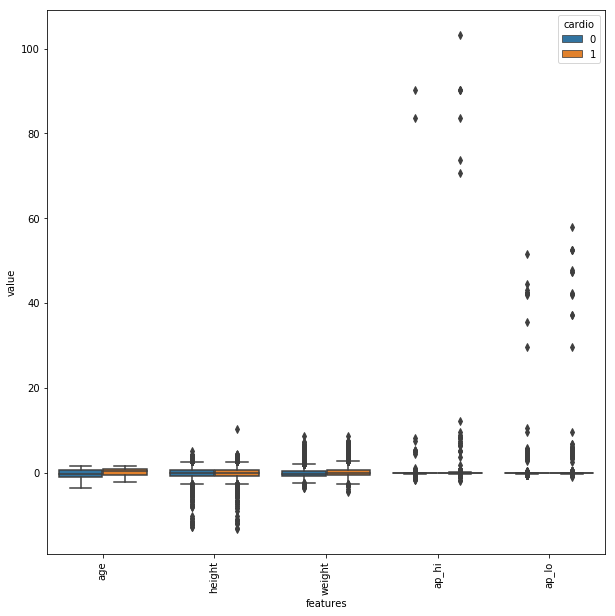

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)

Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

### Removing outliers 
Height
Max height = 7.1ft = 213cm 
min height < 100cm 

Weight 
Min weight = 25kg
(less than 1% of data is lost)

In [38]:
data.drop(data[(data['height'] > 213) | (data['height'] < 100)].index,inplace=True)
data.drop(data[(data['weight'] < 25)].index,inplace=True)

print(data.shape)


(69965, 12)


In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure

In [39]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1231 cases


maximum systolic blood pressure can be atmost 250mm/Hg and minimum blood pressure is 80mm/Hg. 
maximum diastolic bllod pressure can be atmost 150mm/Hg and minimum blood pressure is 50mm/Hg
By setting these boundaries we are removing outliers as well as retaining crtical cases. 

In [40]:
data.drop(data[(data['ap_hi'] > 210) | (data['ap_hi'] < 80)].index,inplace=True)
data.drop(data[(data['ap_lo'] > 150) | (data['ap_lo'] < 50)].index,inplace=True)

print(data.shape)

(68661, 12)


### Performing one-hot encoding on nominal columns

In [41]:
data["male"] = data["gender"] == 2
data["female"] = data["gender"] == 1

data = data.astype({"male" : "int8", "female" : "int8"})
#data.drop("gender",axis = 1, inplace = True)

## Feature Engineering
We can capture information of both weight and height in a column called bmi

In [42]:
# Calculation of BMI

data['bmi'] = data['weight'] / ((data['height']/100) ** 2)
data.drop(['weight', 'height'], axis=1, inplace= True)

### We will convert blood pressure into ordinal variable based on the below table 

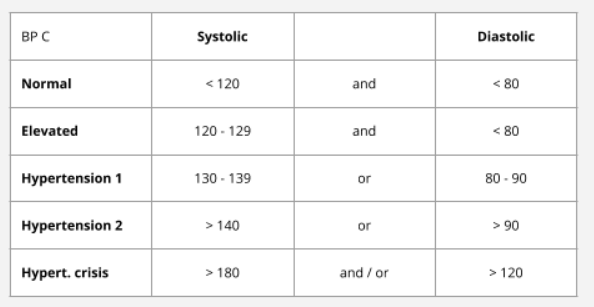

In [43]:
data['bpc'] = 0

data.loc[(data['ap_hi'] < 120) & (data['ap_lo'] < 80), 'bpc'] = 1

data.loc[((data['ap_hi'] >= 120) & (data['ap_hi'] < 130)) &
         ((data['ap_lo'] < 80)), 'bpc'] = 2

data.loc[((data['ap_hi'] >= 130) & (data['ap_hi'] < 140)) |
         ((data['ap_lo'] >= 80) & (data['ap_lo'] < 90)), 'bpc'] = 3

data.loc[((data['ap_hi'] >= 140) & (data['ap_hi'] < 180)) |
         ((data['ap_lo'] >= 90) & (data['ap_lo'] < 120)), 'bpc'] = 4

data.loc[(data['ap_hi'] >= 180) | (data['ap_lo'] >= 120), 'bpc'] = 5

cols_ap_ = ['ap_hi', 'ap_lo']
data.drop(cols_ap_, axis= 1, inplace= True)



In [44]:
data.to_csv("preprocessed_data.csv", index = False)

In [45]:
data

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,male,female,bmi,bpc
0,18393,2,1,1,0,0,1,0,1,0,21.967120,3
1,20228,1,3,1,0,0,1,1,0,1,34.927679,4
2,18857,1,3,1,0,0,0,1,0,1,23.507805,3
3,17623,2,1,1,0,0,1,1,1,0,28.710479,4
4,17474,1,1,1,0,0,0,0,0,1,23.011177,1
5,21914,1,2,2,0,0,0,0,0,1,29.384676,3
6,22113,1,3,1,0,0,1,0,0,1,37.729725,3
7,22584,2,3,3,0,0,1,1,1,0,29.983588,4
8,17668,1,1,1,0,0,1,0,0,1,28.440955,1
9,19834,1,1,1,0,0,0,0,0,1,25.282570,1
